<a href="https://colab.research.google.com/github/techwizi/SURGE-23-Cryptocurrency-Price-Forecasting/blob/main/ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ARIMA Model**

In [ ]:
import pandas as pd
import numpy as np
import pylab as plab
import matplotlib.pyplot as plt

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [ ]:
data = pd.read_csv('coin_Ethereum.csv')
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


<class 'pandas.core.frame.DataFrame'>
                        Close
Date                         
2015-08-08 23:59:59  0.753325
2015-08-09 23:59:59  0.701897
2015-08-10 23:59:59  0.708448
2015-08-11 23:59:59  1.067860
2015-08-12 23:59:59  1.217440


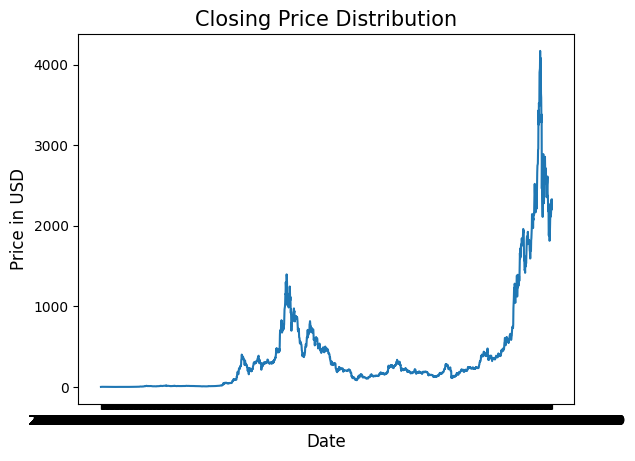

In [ ]:
close = data['Close']
dates = data['Date']
data = data[['Date','Close']]

# Setting the date as index
data2 = data.set_index('Date')
data2.sort_index(inplace=True)
print (type(data2))
print (data2.head())

#Plotting the price data
plt.plot(data2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing Price Distribution", fontsize=15)
plt.show()

In [ ]:
# STATIONARITY TEST

def test_stationarity(x):

    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey Fuller test
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is not stationary")
            break
         else:
            print("The graph is stationary")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

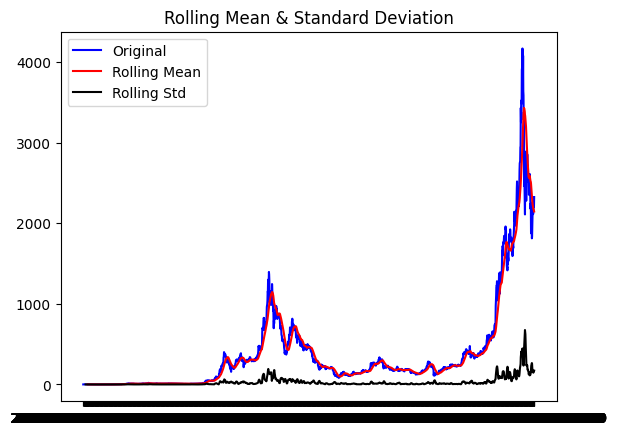

ADF Stastistic: -0.026066
p-value: 0.956323
The graph is not stationary
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [ ]:
ts = data2['Close']
test_stationarity(ts)

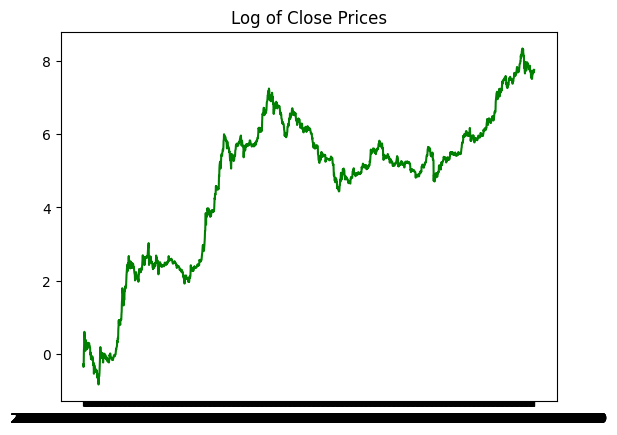

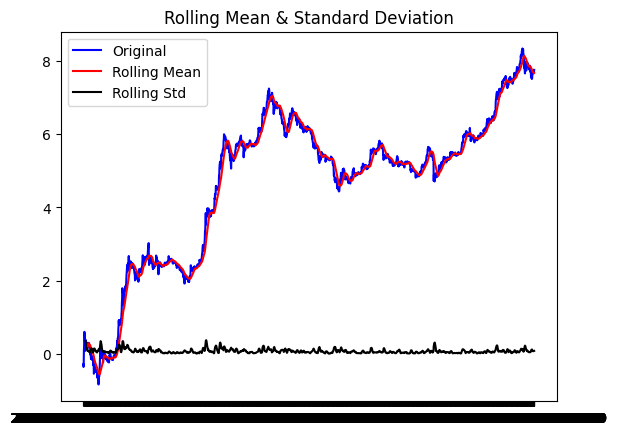

ADF Stastistic: -1.649868
p-value: 0.457109
The graph is not stationary
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [ ]:
ts_log = np.log(ts)
plt.title('Log of Close Prices')
plt.plot(ts_log,color="green")
plt.show()

test_stationarity(ts_log)

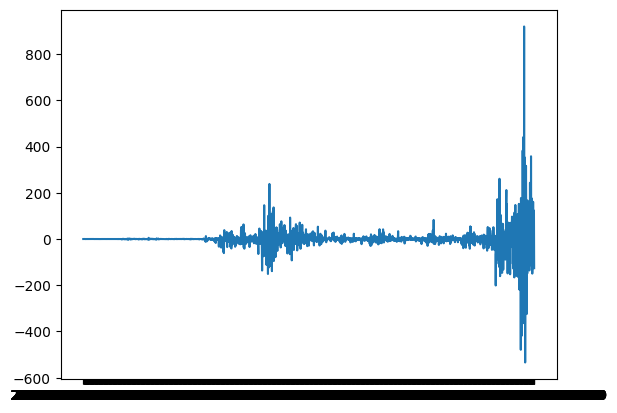

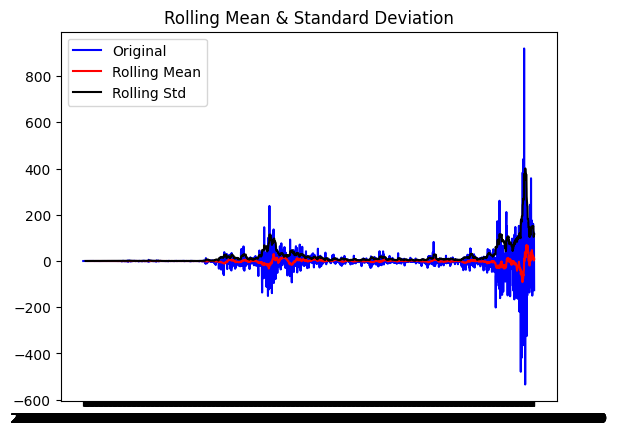

ADF Stastistic: -9.806604
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [ ]:
#Differencing technique to remove seasonality
ts_diff = ts - ts.shift(-1)
ts_diff.dropna(inplace=True)
plt.plot(ts_diff)
plt.show()
test_stationarity(ts_diff)

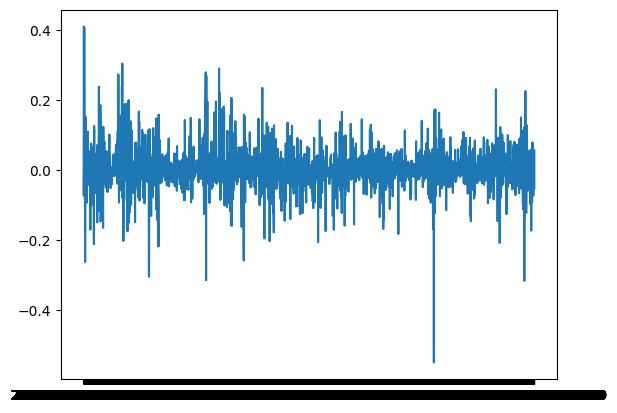

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

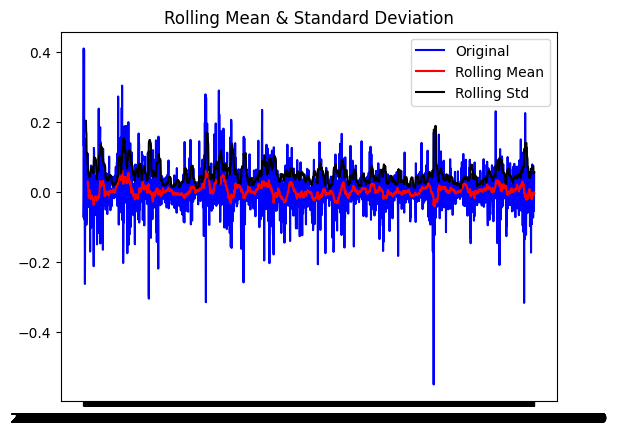

ADF Stastistic: -8.422302
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
model = ARIMA(ts_log, order=(2,1,0))
results_ARIMA = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


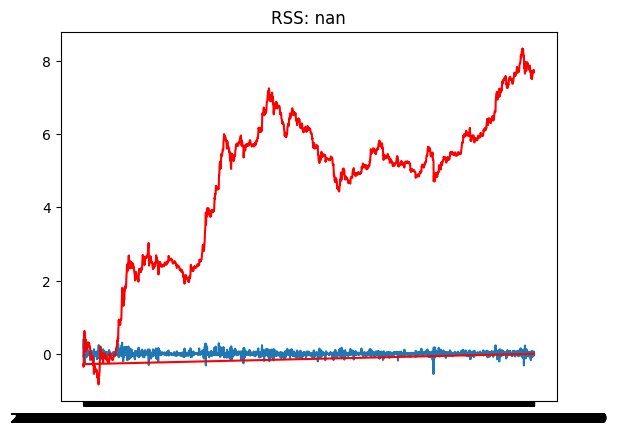

In [ ]:
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op


 RMSE for the Predicted Values : 193.351153  %


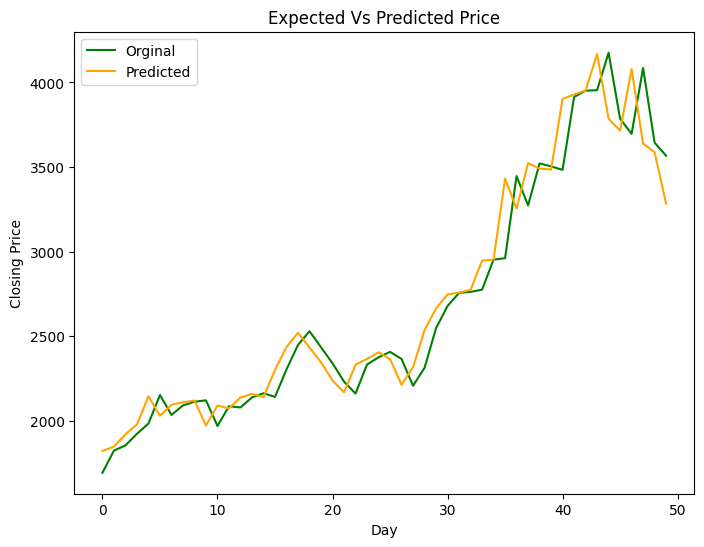

In [ ]:
size = int(len(ts_log)-100)

# Dividing dataset into train and test data
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
sq_error_list = list()

# We go over each value in the test set and then apply ARIMA model and calculate the predicted value.
#We have the expected value in the test set therefore we calculate the error between predicted and expected value.
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]
    original_value = test_arima[t]
    history.append(original_value)

    pred_value = np.exp(pred_value)
    original_value = np.exp(original_value)

    # Calculating the RMSE
    sq_error = (pred_value - original_value)**2
    sq_error_list.append(sq_error)

    predictions.append(float(pred_value))
    originals.append(float(original_value))

# After iterating over whole test set the overall mean error is calculated.
print('\n RMSE for the Predicted Values : %f ' % (np.sqrt(sum(sq_error_list)/float(len(sq_error_list)))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day[:50], predictions[:50], color= 'green')
plt.plot(test_day[:50], originals[:50], color = 'orange')
plt.title('Expected Vs Predicted Price')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()